<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Outlier removal using IQR
    </p>
</div>

---

<div style="background-color:gainsboro; padding:8px; border:2px dotted black; border-radius:8px; font-family:verdana; line-height: 1.7em">
<strong>Whar is IQR?</strong>
<br>
• The Interquartile Range (IQR) is a measure of statistical dispersion that is particularly useful for identifying outliers in a dataset. <br>
• The IQR is the range between the first quartile (Q1) and the third quartile (Q3) and represents the middle 50% of the data. 
<br>
<br>
Here’s how to use the IQR to identify and handle outliers:
<br>
<br>
<strong>Steps for Outlier Removal using</strong>
<br>
• The median of the lower half of the dataset (25th percentile or Q1).
<br>
• The median of the upper half of the dataset (75th percentile or ).
<br>
• Compute the IQR value $\text{IQR} = Q3 - Q1$
<br>
• Calculate the lower and upper bounds for outliers.
<br>
&nbsp;&nbsp;→ Upper limit : $\text{Upper Bound} = Q3 + 1.5 \times \text{IQR}$
<br>
&nbsp;&nbsp;→ Lower limit : $\text{Lower Bound} = Q1 - 1.5 \times \text{IQR}$
<br>
• Any data point below the lower bound or above the upper bound is considered an outlier.
<br>
<br>
<strong>Conclusion</strong>
<br>
• Using the IQR method for outlier detection is effective, especially for skewed distributions or when the dataset contains extreme values. 
<br>
• It is robust and less influenced by outliers than methods based on the mean and standard deviation. 
<br>
• Understanding and applying this technique can enhance your data analysis and modeling accuracy.
</div>

In [17]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Reading CSV File
df = pd.read_csv("placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
308,7.20,47.0,1
326,7.54,13.0,0
403,6.71,83.0,0
523,6.13,19.0,0
493,6.80,18.0,0


In [19]:
# Shape of the DataFrame
df.shape

(1000, 3)

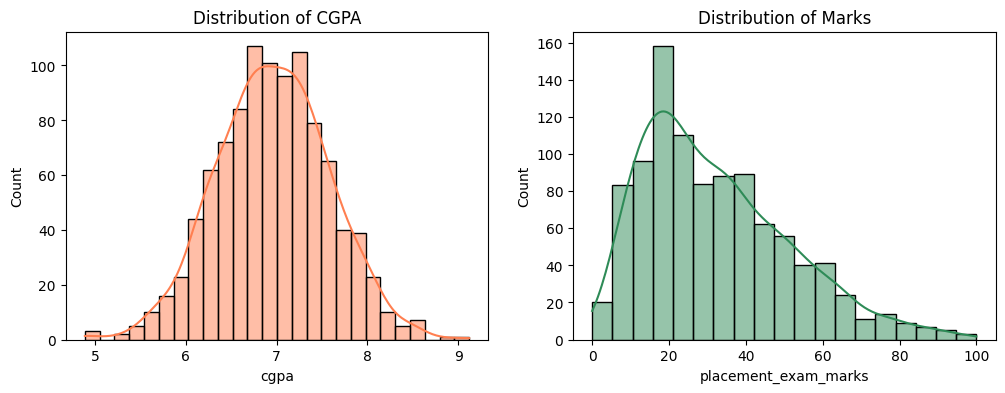

In [20]:
# Distribution of CGPA and Marks Column 
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
sns.histplot(df["cgpa"], kde=True, color="coral", ax=ax[0])
ax[0].set_title("Distribution of CGPA")
sns.histplot(df["placement_exam_marks"], kde=True, color="seagreen", ax=ax[1])
ax[1].set_title("Distribution of Marks")
plt.show()

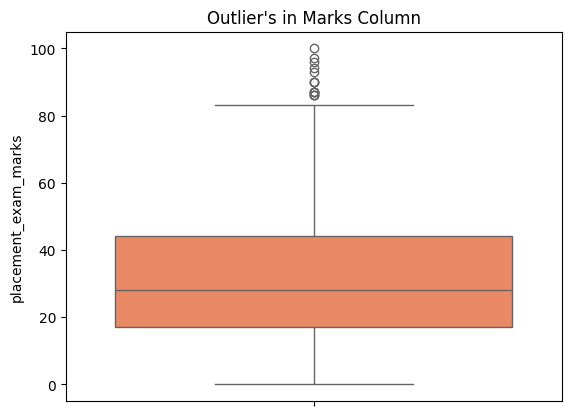

In [22]:
# Box Plot of Marks Column
sns.boxplot(df["placement_exam_marks"], color="coral")
plt.title("Outlier's in Marks Column")
plt.show()

In [23]:
# 25th Percentile of Marks Column
percentile_25 = df["placement_exam_marks"].quantile(0.25)
print("25th Percentile :", percentile_25)

# 75th Percentile of Marks Column
percentile_75 = df["placement_exam_marks"].quantile(0.75)
print("75th Percentile :", percentile_75)

25th Percentile : 17.0
75th Percentile : 44.0


In [24]:
# Inter Quartile Range of Marks Column
iqr = percentile_75 - percentile_25
print("IQR of Marks Column :", iqr)

IQR of Marks Column : 27.0


In [25]:
# Upper limit for Outlier
upper_limit = percentile_75 + 1.5*iqr
print("Upper Limit :", upper_limit)

# Lower limit for Outlier
lower_limit = percentile_25 - 1.5*iqr
print("Lower Limit :", lower_limit)

Upper Limit : 84.5
Lower Limit : -23.5


<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Trimming
    </p>
</div>

---

In [26]:
# Data that are potentially Outlier
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [33]:
# Trimming DataFrame
new_df = df[df["placement_exam_marks"] < upper_limit]
new_df.sample(5)

,cgpa,placement_exam_marks,placed
83,7.38,20.0,1
316,7.07,38.0,1
85,6.03,28.0,0
297,7.03,32.0,1
767,7.33,31.0,0


In [28]:
# Shape of the DataFrame
new_df.shape

(985, 3)

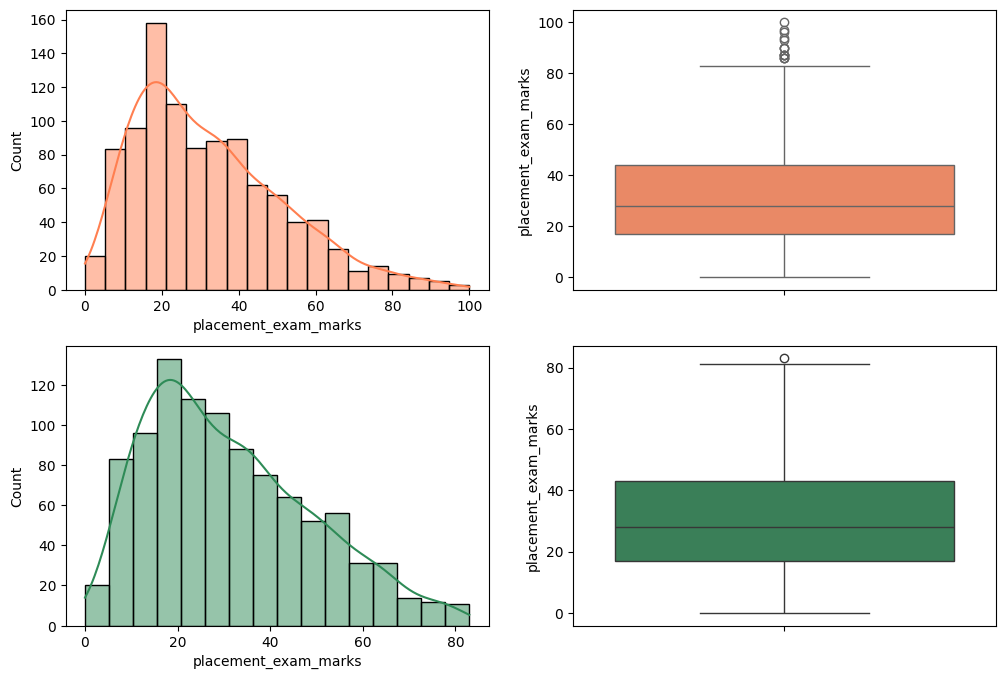

In [29]:
# Distribution and Outliers in Marks Column before and after Outlier Removal
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
sns.histplot(df["placement_exam_marks"], kde=True, color="coral", ax=ax[0,0])
sns.histplot(new_df["placement_exam_marks"], kde=True, color="seagreen", ax=ax[1,0])
sns.boxplot(df["placement_exam_marks"], color="coral", ax=ax[0,1])
sns.boxplot(new_df["placement_exam_marks"], color="seagreen", ax=ax[1,1])
plt.show()

<div id="header">
    <p style="color:#6a66bd; text-align:center; font-weight:bold; font-family:verdana; font-size:20px;">
        Capping
    </p>
</div>

---

In [30]:
# Capping values that are Outlier
new_df_copy = df.copy()

new_df_copy["placement_exam_marks"] = np.where(
    new_df_copy['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_copy['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_copy['placement_exam_marks']
    )
)

In [31]:
# Shape of the DataFrame
new_df_copy.shape

(1000, 3)

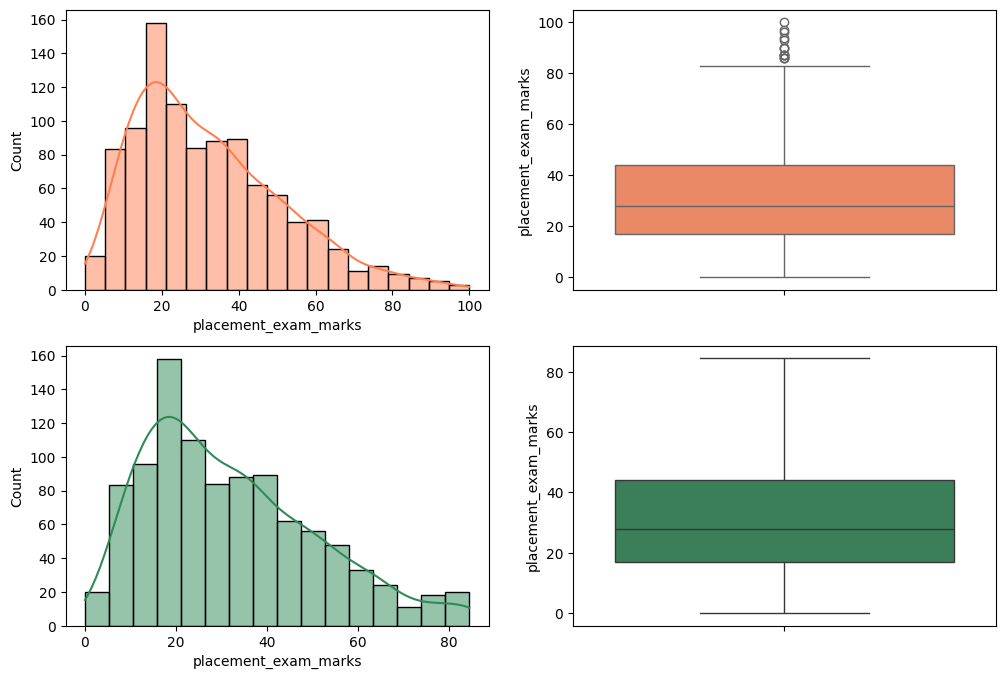

In [32]:
# Distribution and Outliers in Marks Column before and after Outlier Removal
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
sns.histplot(df["placement_exam_marks"], kde=True, color="coral", ax=ax[0,0])
sns.histplot(new_df_copy["placement_exam_marks"], kde=True, color="seagreen", ax=ax[1,0])
sns.boxplot(df["placement_exam_marks"], color="coral", ax=ax[0,1])
sns.boxplot(new_df_copy["placement_exam_marks"], color="seagreen", ax=ax[1,1])
plt.show()